In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv', usecols = ['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [8]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [9]:
X_test.tail()


,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [10]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [11]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values


array([23. , 33. , 28. , 17. , 40. , 30.5, 51. , 51. , 24. , 16. , 24. ,
       32. , 34. , 14. , 36. , 28. , 30. , 30. , 14.5,  4. , 46. , 59. ,
       26. , 36.5, 30. , 41. , 61. , 26. , 54. , 30. , 24. , 35. , 34. ,
       28. ,  3. , 40. , 27. , 30. , 31. ,  3. , 47. , 21. ,  1. , 41. ,
       45. , 29. , 36. , 28.5, 33. , 23. , 38. , 24. , 30. , 16. , 21. ,
       18. , 21. , 40. , 38. , 22. , 18. , 33. , 52. , 34. , 16. , 40. ,
       25. , 30. ,  9. , 42. , 42. , 45. , 21. , 35. , 26. , 47. ,  7. ,
       56. , 21. , 32. , 28. , 21. , 34. , 21. , 20. , 20. , 24. , 29. ,
       23. , 40.5, 17. , 21. , 24. ,  2. , 39. , 24. , 25. ,  2. , 31. ,
        3. , 34. , 33. , 28. , 16. , 19. ,  9. , 19. , 48. , 29. ,  5. ,
       36. , 18. , 14. , 50. , 49. , 36. , 18. , 24. , 13. , 20. , 47. ,
       60. , 24. , 36. ,  6. , 65. , 22. , 32. , 28. , 19. , 45. , 15. ,
       25. , 45. , 26. , 30. , 15. , 34. , 36. , 39. , 23. , 26. , 30. ,
       22. , 18. , 35. , 21. , 24. ])

In [12]:
X_train['Age'].isnull().sum()


148

In [13]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,32.0
493,71.0,49.5042,71.0
527,NaN,221.7792,24.0


<ipython-input-14-a4e9b458bbaf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
<ipython-input-14-a4e9b458bbaf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)


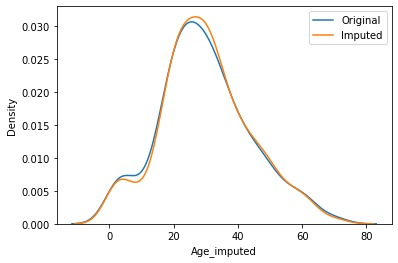

In [14]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [20]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  196.05093361383715


In [24]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()


,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,61.138449
Age,71.512440,204.349513,204.349513
Age_imputed,61.138449,204.349513,196.050934


<AxesSubplot: >

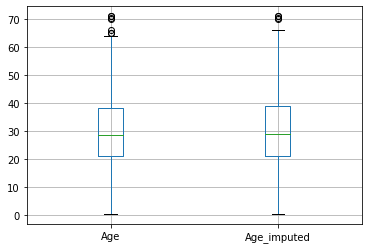

In [25]:
X_train[['Age', 'Age_imputed']].boxplot()


In [26]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

NameError: name 'observation' is not defined